In [62]:
import torch
import numpy as np
import pandas as pd


In [63]:
#df=pd.read_csv("C:\\Users\\shrey\\OneDrive\\Documents\\.PES\\PIL\\fin-dataset_2.csv")
df=pd.read_csv("C:\\Users\\shrey\\OneDrive\\Documents\\.PES\\PIL\\full_dataset_with_int_map.csv")
df
#df.drop(['node_code'],axis=1)
df.head()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7400 non-null   int64  
 1   0                    7400 non-null   float64
 2   1                    7400 non-null   float64
 3   2                    7400 non-null   float64
 4   3                    7400 non-null   float64
 5   4                    7400 non-null   float64
 6   5                    7400 non-null   float64
 7   6                    7400 non-null   float64
 8   7                    7400 non-null   float64
 9   8                    7400 non-null   float64
 10  9                    7400 non-null   float64
 11  10                   7400 non-null   float64
 12  11                   7400 non-null   float64
 13  wlan_code_index      7400 non-null   int64  
 14  x(m)                 7400 non-null   float64
 15  y(m)                 7400 non-null   f

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,wlan_code_index,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,average_airtime,throughput
0,0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,0,10.0,10.0,4,4,5,-58.226667,29.620000,95.74500,111.77
1,1,-79.34,10000.00,-82.35,-100.95,-91.84,-85.36,-94.85,-105.59,-108.60,...,1,30.0,10.0,6,6,7,-55.365000,30.275000,89.63500,111.11
2,2,-100.95,-79.34,10000.00,-79.34,-108.60,-94.85,-85.36,-88.83,-119.82,...,2,50.0,10.0,0,0,3,-60.646111,21.308333,63.36250,77.72
3,3,-119.98,-100.95,-82.35,10000.00,-125.96,-111.61,-94.85,-79.34,-133.97,...,3,70.0,10.0,2,2,3,-54.633077,29.581538,38.85500,43.05
4,4,-79.34,-88.83,-108.60,-122.95,10000.00,-85.36,-106.97,-119.98,-82.35,...,4,10.0,30.0,0,0,3,-58.994444,25.089444,41.93500,79.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,7395,-88.83,-82.35,-94.85,-108.60,-79.34,10000.00,-85.36,-103.96,-88.83,...,5,30.0,30.0,0,0,7,-55.834286,11.962857,20.09125,46.16
7396,7396,-105.59,-91.84,-85.36,-91.84,-100.95,-85.36,10000.00,-82.35,-105.59,...,6,50.0,30.0,0,0,7,-39.920000,16.840000,35.25125,116.58
7397,7397,-122.95,-108.60,-94.85,-82.35,-119.98,-106.97,-85.36,10000.00,-122.95,...,7,70.0,30.0,0,0,3,-53.174286,22.284286,44.76000,84.17
7398,7398,-100.95,-108.60,-122.83,-133.97,-79.34,-94.85,-111.61,-125.96,10000.00,...,8,10.0,50.0,4,4,5,-50.328000,21.276000,57.23500,20.81


In [64]:
from sklearn.model_selection import train_test_split
y=df['throughput'].values #throughput 


#x=df[[ 'node_type', 'x(m)', 'y(m)',
#       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
#       'SINR', 'average_airtime', 'average_interference',
#       'wlan_code_index']].values
x=df[['0','1','2','3','4', '5', '6', '7', '8', '9', '10',
       '11', 'wlan_code_index', 'x(m)', 'y(m)', 'primary_channel',
       'min_channel_allowed', 'max_channel_allowed', 'RSSI', 'SINR',
       'average_airtime']].values  
#x=df[[ 'wlan_code_index', 'x(m)', 'y(m)', 'primary_channel',
#       'min_channel_allowed', 'max_channel_allowed', 'RSSI', 'SINR',
#       'average_airtime']].values        
      

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("PyTorch Version: ", torch.__version__)
       

PyTorch Version:  1.12.0+cu113


### Converting the dataframe into tensors for pytorch

In [65]:
#X_train.to_numpy()
X_train = torch.from_numpy(X_train).float()
X_train
y_train = torch.squeeze(torch.from_numpy(y_train).float())
X_test = torch.from_numpy(X_test).float()
y_test = torch.squeeze(torch.from_numpy(y_test).float())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_test

torch.Size([5920, 21]) torch.Size([5920])
torch.Size([1480, 21]) torch.Size([1480])


tensor([ 65.6700,  89.7600, 117.3800,  ..., 141.2400,  12.9800, 131.4400])

#### Neural network

In [66]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 256)
    self.fc2 = nn.Linear(256, 256)
    self.fc3=nn.Linear(256,256)
    self.fc4 = nn.Linear(256, 256) # result is a single number so only one output
    self.fc5=nn.Linear(256,256)
    self.fc6=nn.Linear(256,256)
    self.fc7=nn.Linear(256,256)
    self.fc8=nn.Linear(256,256)
    self.fc9=nn.Linear(256,256)
    self.fc10=nn.Linear(256,1)
    #self.fc4=nn.ReLU(1,4)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    #return torch.sigmoid(self.fc3(x))
    x=F.relu(self.fc3(x))
    x=F.relu(self.fc4(x))
    x=F.relu(self.fc5(x))
    x=F.relu(self.fc6(x))
    x=F.relu(self.fc7(x))
    x=F.relu(self.fc8(x))
    x=F.relu(self.fc9(x))
    return self.fc10(x)

    #return (x)
# an instance
net = Net(X_train.shape[1])    

![the NN]("NN1.png")

#### Running it locally on gpu:

In [67]:

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) # lr is taken to be a small value for trial purposes


In [68]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device=torch.device("cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
net = net.to(device)
criterion = criterion.to(device)
print(X_train, y_train, X_test, y_test)


tensor([[-1.0559e+02, -1.0396e+02, -1.0559e+02,  ..., -5.4370e+01,
          1.4528e+01,  1.9985e+01],
        [-8.2350e+01, -9.6980e+01,  1.0000e+04,  ..., -5.3907e+01,
          2.3477e+01,  3.8877e+01],
        [-8.8200e+01,  1.0000e+04, -9.2780e+01,  ..., -5.6423e+01,
          2.1201e+01,  5.7935e+01],
        ...,
        [-1.0302e+02, -9.3680e+01, -9.2780e+01,  ..., -5.7992e+01,
          1.8361e+01,  2.8885e+01],
        [-8.2350e+01, -9.6980e+01,  1.0000e+04,  ..., -5.1421e+01,
          3.0713e+01,  4.7320e+01],
        [-9.0270e+01, -7.8160e+01, -8.7260e+01,  ..., -6.1200e+01,
          1.3876e+01,  9.3225e+00]]) tensor([ 56.6000,  84.3300, 194.7600,  ...,  36.1000,  65.5300,  15.2800]) tensor([[-1.0300e+02, -9.0670e+01, -9.1840e+01,  ..., -5.2751e+01,
          2.6772e+01,  4.7490e+01],
        [ 1.0000e+04, -9.6690e+01, -8.5360e+01,  ..., -5.3217e+01,
          2.5479e+01,  7.8850e+01],
        [-1.0095e+02, -7.9340e+01,  1.0000e+04,  ..., -5.4286e+01,
          2.9534e+01

In [69]:
#def calculate_accuracy(y_true, y_pred):
#  predicted = y_pred#.ge(.5).view(-1)
#  return (y_true == predicted).sum().float() / len(y_true)
#  #correct=0 #test
#  #for i in range(len(y_true)):
#  #              correct += (((abs(y_pred[i] - y_true[i])/y_true[i]) * 100) < 10).type(torch.float).item()
#  #return correct
  

### TRAINING:

In [70]:
#define a new accuracy function based on r2
from sklearn.metrics import r2_score

#def accuracy_r2(y_true, y_pred):
#  y_true=y_true.numpy()
#  y_pred=y_pred.numpy()
#  y_true=y_true.reshape(-1)
#  y_pred=y_pred.reshape(-1)
#  r2=r2_score(y_true,y_pred)
#  return r2

def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

iteration_list=[]
loss_list=[] # to be updated
accuracy_list=[]

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#X_train = X_train.to(device)
#y_train = y_train.to(device)
#X_test = X_test.to(device)
#y_test = y_test.to(device)
#net = net.to(device)
#criterion = criterion.to(device)

for epoch in range(10000):
    
    
    y_pred = net(X_train)

    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    iteration_list.append(epoch)
    loss_list.append(round_tensor(train_loss))
    #accuracy_list.append(round_tensor(accuracy_r2(y_train, y_pred)))
    #append r2 score into accuracy list
    accuracy_list.append(round_tensor(r2_score(y_train.detach(), y_pred.detach())))

    if epoch % 100 == 0:
      total=0
      
      train_acc = r2_score(y_train.detach(), y_pred.detach())
      

      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}

''')
      #print(f"{y_test_pred}, {y_test}")  Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    

epoch 0
Train set - loss: 10290.11, accuracy: -2.547


epoch 100
Train set - loss: 2604.162, accuracy: 0.102


epoch 200
Train set - loss: 2513.213, accuracy: 0.134


epoch 300
Train set - loss: 1981.5, accuracy: 0.317


epoch 400
Train set - loss: 1283.901, accuracy: 0.557


epoch 500
Train set - loss: 1185.001, accuracy: 0.591


epoch 600
Train set - loss: 1092.449, accuracy: 0.623


epoch 700
Train set - loss: 1610.617, accuracy: 0.445


epoch 800
Train set - loss: 957.742, accuracy: 0.67


epoch 900
Train set - loss: 937.395, accuracy: 0.677


epoch 1000
Train set - loss: 862.196, accuracy: 0.703


epoch 1100
Train set - loss: 918.258, accuracy: 0.683


epoch 1200
Train set - loss: 798.433, accuracy: 0.725


epoch 1300
Train set - loss: 767.695, accuracy: 0.735


epoch 1400
Train set - loss: 767.661, accuracy: 0.735


epoch 1500
Train set - loss: 853.999, accuracy: 0.706


epoch 1600
Train set - loss: 851.361, accuracy: 0.707


epoch 1700
Train set - loss: 708.979, accuracy: 0.756


In [71]:
with torch.no_grad():
      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = r2_score(y_test.detach(), y_test_pred.detach())
      print(f"Test  set - loss: {round_tensor(test_loss)}, accuracy:{round_tensor(test_acc)} MSE: {round_tensor(test_loss)}")
    

Test  set - loss: 493.172, accuracy:0.847 MSE: 493.172


### METRICS

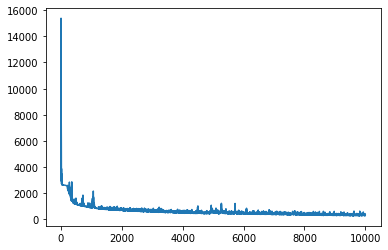

In [72]:
#use this to see the loss graph
import matplotlib.pyplot as plt
plt.plot(iteration_list, loss_list)
plt.show()


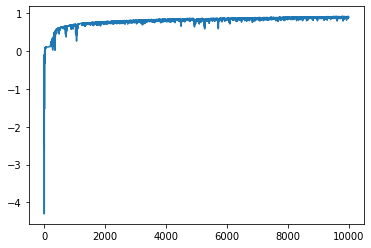

In [73]:
#plot the accuracy graph
plt.plot(iteration_list, accuracy_list)
plt.show()